In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, fbeta_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv('dataset_curso.csv')
df = df[['num_comments', 'score', 'upvote_ratio', '2_way_label']]
df= df[~df['num_comments'].isna()]
X = df[['num_comments', 'score', 'upvote_ratio']]
y = df['2_way_label']

In [80]:
X.isna().sum()

num_comments    0
score           0
upvote_ratio    0
dtype: int64

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
def evaluate(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(accuracy_score(y_test, y_pred))
    print(recall_score(y_test, y_pred))
    print(precision_score(y_test, y_pred))
    print(f1_score(y_test, y_pred))
    print(fbeta_score(y_test, y_pred, beta=0.7))
    
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm,
        display_labels=model.classes_
    )
    
    disp.plot()
    plt.show()

0.6517350157728706
0.7310421286031042
0.680635838150289
0.704939063502245
0.6964275081869605


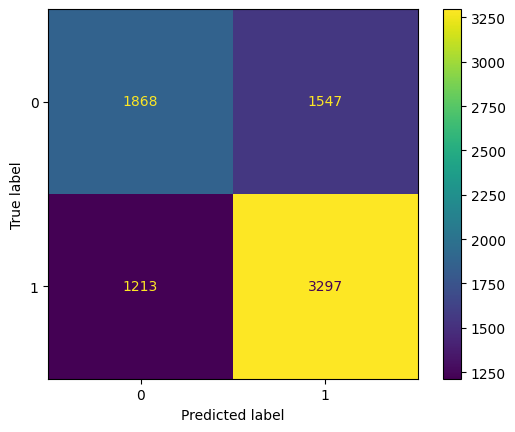

In [83]:
model = LogisticRegression(random_state=42)
evaluate(model)

0.5798107255520505
0.970509977827051
0.5778980723527859
0.724428997020854
0.666577745070984


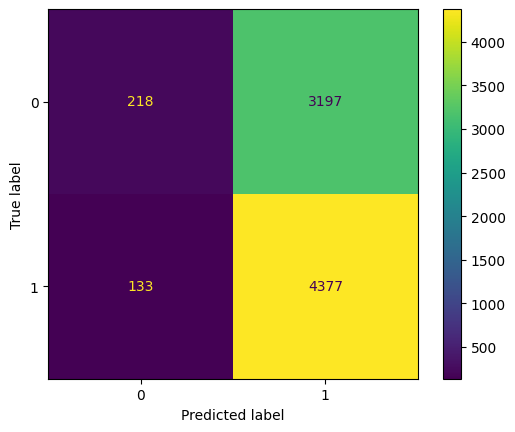

In [84]:
model = SVC(random_state=42)
evaluate(model)

0.6989274447949527
0.7731707317073171
0.7189690721649484
0.7450854700854701
0.7359353531919716


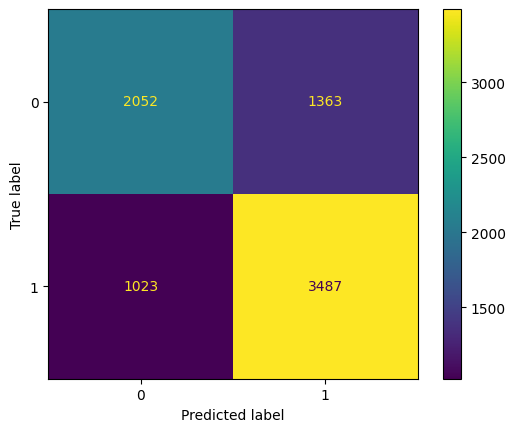

In [85]:
model = MLPClassifier(random_state=1, max_iter=300)
evaluate(model)

0.6948895899053628
0.7124168514412417
0.7413474850023073
0.7265943012211667
0.7315774996561684


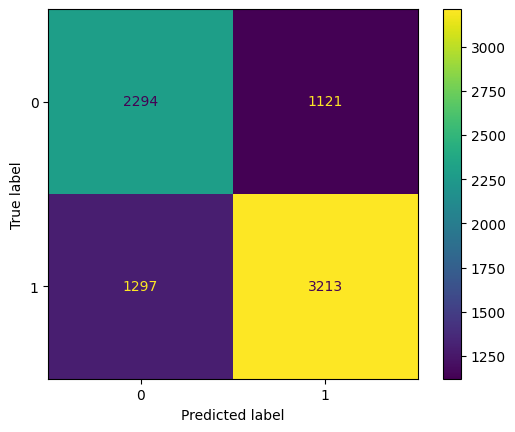

In [86]:
model = RandomForestClassifier(n_estimators=10)
evaluate(model)

0.6928706624605678
0.7317073170731707
0.7294429708222812
0.7305733894177552
0.7301860734492641


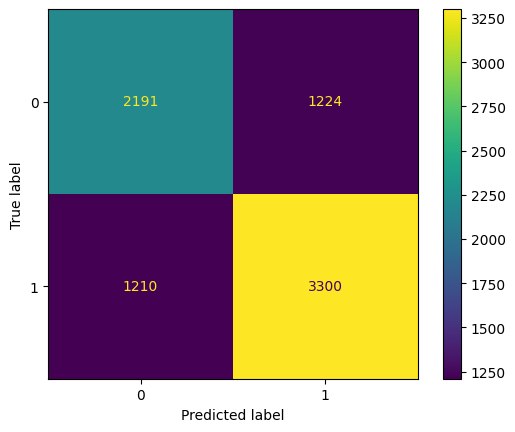

In [87]:
model = GradientBoostingClassifier(n_estimators=10)
evaluate(model)